Epoch 1/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.3392
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2027
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0509
Epoch 4/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0316
Epoch 5/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0420 
Epoch 6/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0289
Epoch 7/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0363
Epoch 8/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0208
Epoch 9/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0183 
Epoch 10/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0172 
Epoch 11/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0154
Epoch 12/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0182
Epoch 13/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0173
Epoch 14/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0146 
Epoch 15/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0207 
Epoch 16/200
6/6 ━━

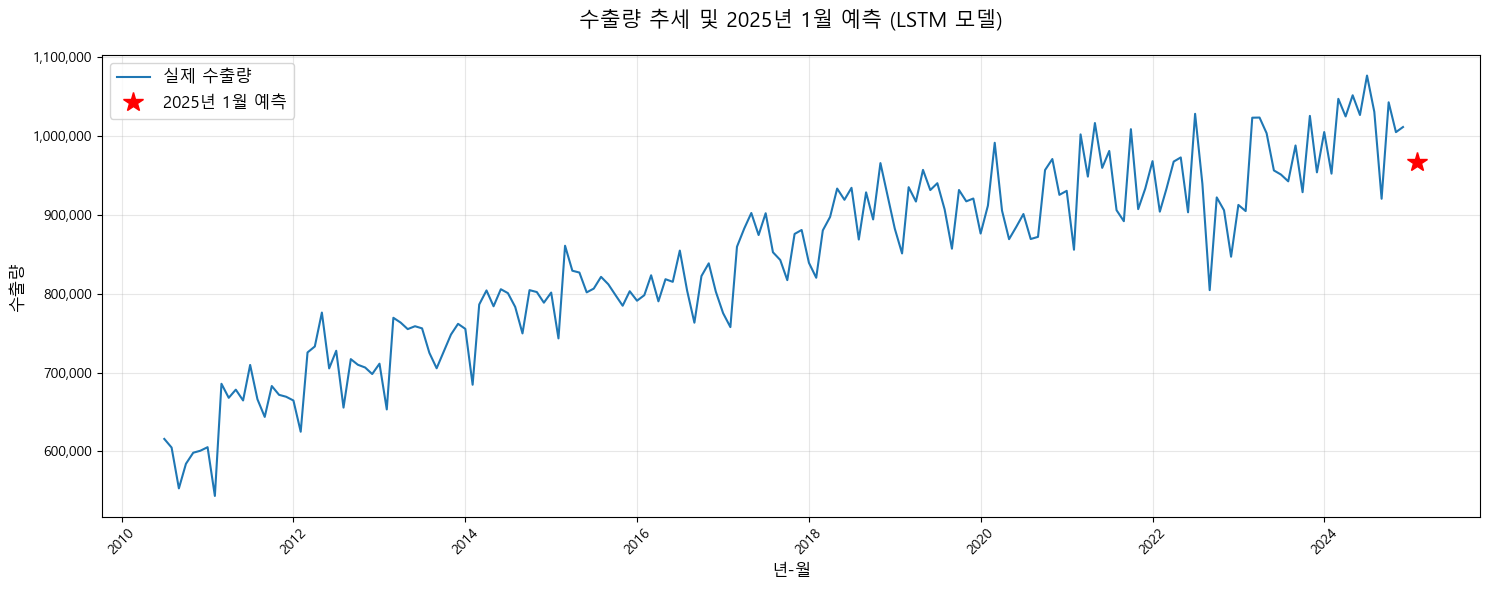

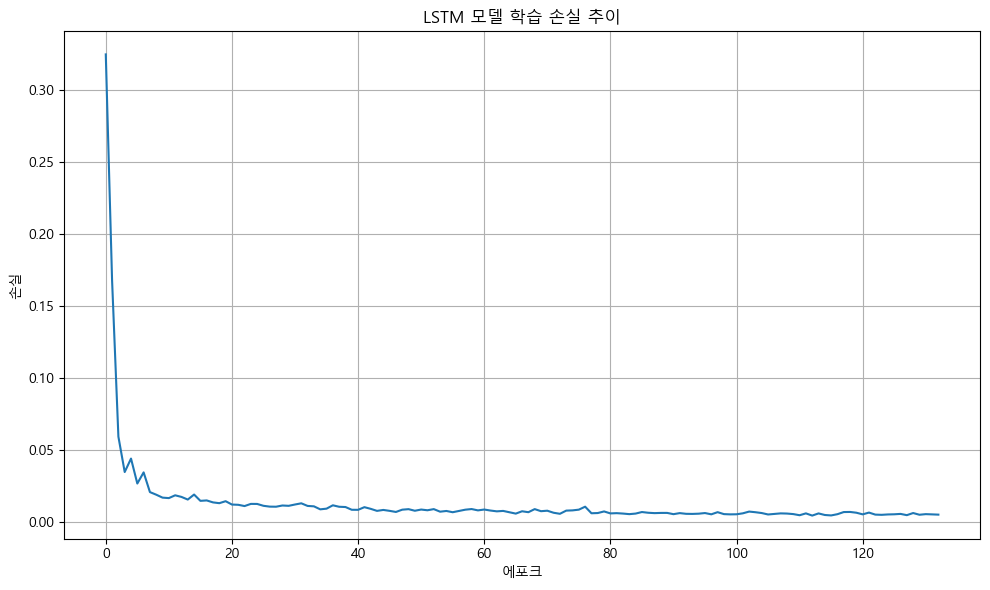

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step  
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


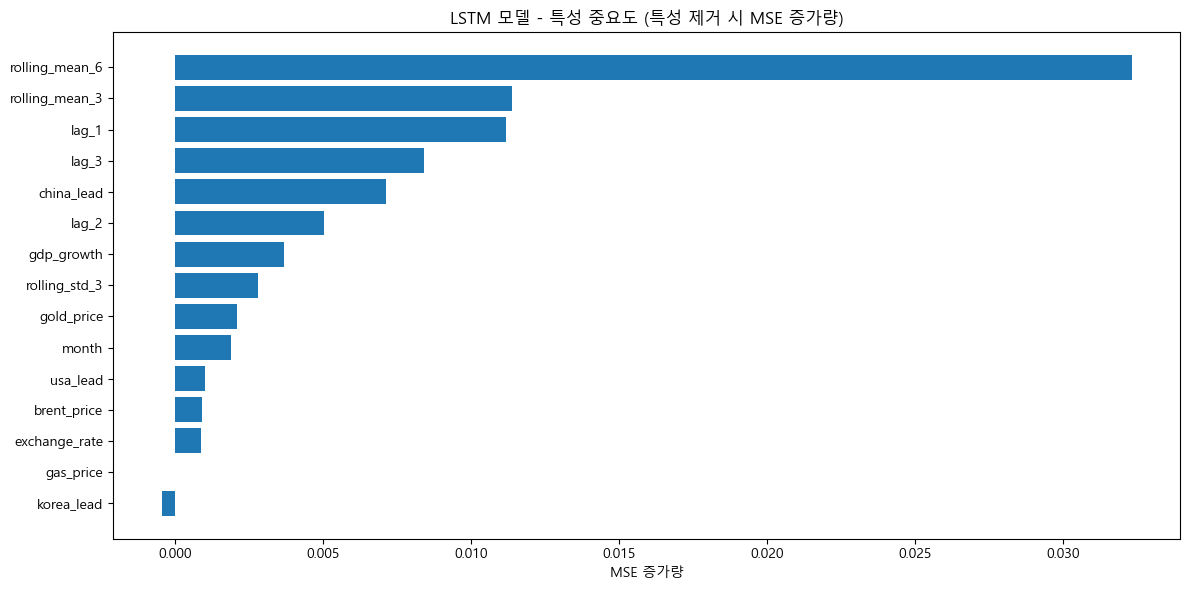

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 

모델 성능 지표:
Mean Squared Error: 1,508,271,520.13
Root Mean Squared Error: 38,836.47
Mean Absolute Error: 30,800.40
R2 Score: 0.8745


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')
# 마이너스 부호 깨짐 방지
plt.rc('axes', unicode_minus=False)

# 데이터 로드
df = pd.read_csv('data_integ_1.csv', parse_dates=['date'])
df.set_index('date', inplace=True)

# Lag 및 파생변수 생성
df['lag_1'] = df['export'].shift(1)
df['lag_2'] = df['export'].shift(2)
df['lag_3'] = df['export'].shift(3)
df['rolling_mean_3'] = df['export'].rolling(window=3).mean().shift(1)
df['rolling_mean_6'] = df['export'].rolling(window=6).mean().shift(1)
df['rolling_std_3'] = df['export'].rolling(window=3).std().shift(1)
df['month'] = df.index.month  # 계절성 캡처를 위한 월 정보

# 결측치 처리
df = df.dropna()

# 특성과 타겟 분리
features = ['gdp_growth', 'korea_lead', 'brent_price', 'exchange_rate', 
           'gold_price', 'gas_price', 'usa_lead', 'china_lead',
           'lag_1', 'lag_2', 'lag_3', 'rolling_mean_3', 'rolling_mean_6', 
           'rolling_std_3', 'month']
X = df[features]
y = df['export']

# 데이터 스케일링
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# LSTM을 위한 시퀀스 데이터 준비
def create_sequences(X, y, time_steps=6):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

# 시퀀스 길이 설정 (6개월)
time_steps = 6
X_seq, y_seq = create_sequences(X_scaled, y_scaled, time_steps)

# LSTM 모델 구성
model = Sequential([
    LSTM(128, activation='relu', input_shape=(time_steps, X.shape[1]), return_sequences=True),
    Dropout(0.3),
    LSTM(64, activation='relu', return_sequences=True),
    Dropout(0.3),
    LSTM(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1)
])

# 모델 컴파일
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Early Stopping 설정
early_stopping = EarlyStopping(
    monitor='loss',
    patience=20,
    restore_best_weights=True
)

# 전체 데이터로 모델 학습
history = model.fit(X_seq, y_seq, 
                   epochs=200, 
                   batch_size=32, 
                   callbacks=[early_stopping],
                   verbose=1)

# 2025년 1월 예측을 위한 데이터 준비
last_sequence = X_scaled[-time_steps:]
last_sequence = last_sequence.reshape(1, time_steps, X.shape[1])

# 2025년 1월 수출량 예측
prediction_scaled = model.predict(last_sequence)
prediction_2025_01 = scaler_y.inverse_transform(prediction_scaled)[0][0]

print("\n2025년 1월 수출량 예측:")
print(f"예측 수출량: {prediction_2025_01:,.0f}")

# 과거 데이터와 예측값 시각화
plt.figure(figsize=(15, 6))

# 과거 실제 수출량
plt.plot(y.index, y, linestyle='-', label='실제 수출량', color='#1f77b4')

# 2025년 1월 예측값
future_date = pd.date_range(start=y.index[-1], periods=2, freq='M')[1]
plt.plot([future_date], [prediction_2025_01], marker='*', 
         markersize=15, linestyle='none', label='2025년 1월 예측', color='red')

plt.title('수출량 추세 및 2025년 1월 예측 (LSTM 모델)', fontsize=15, pad=20)
plt.xlabel('년-월', fontsize=12)
plt.ylabel('수출량', fontsize=12)
plt.legend(prop={'size': 12})
plt.grid(True, alpha=0.3)

# x축 설정
plt.xticks(rotation=45)

# y축 포맷팅 (천 단위 쉼표)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: format(int(x), ',')))

plt.tight_layout()
plt.show()

# 학습 손실 시각화
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'])
plt.title('LSTM 모델 학습 손실 추이')
plt.xlabel('에포크')
plt.ylabel('손실')
plt.grid(True)
plt.tight_layout()
plt.show()

# 변수 중요도 분석
importance = []
base_pred = model.predict(X_seq)
base_mse = np.mean((y_seq - base_pred) ** 2)

for feature_idx in range(X.shape[1]):
    # 각 특성을 하나씩 제거(0으로 설정)하고 예측
    X_temp = X_seq.copy()
    X_temp[:, :, feature_idx] = 0
    pred = model.predict(X_temp)
    mse = np.mean((y_seq - pred) ** 2)
    importance.append(mse - base_mse)

# 변수 중요도 시각화
plt.figure(figsize=(12, 6))
importance_df = pd.DataFrame({
    '특성': features,
    '중요도': importance
})
importance_df = importance_df.sort_values('중요도', ascending=True)

plt.barh(importance_df['특성'], importance_df['중요도'])
plt.title('LSTM 모델 - 특성 중요도 (특성 제거 시 MSE 증가량)')
plt.xlabel('MSE 증가량')
plt.tight_layout()
plt.show()

# 모델 성능 지표 출력
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 전체 데이터에 대한 예측
all_sequences = create_sequences(X_scaled, y_scaled, time_steps)[0]
predictions_scaled = model.predict(all_sequences)
predictions = scaler_y.inverse_transform(predictions_scaled)
actual = scaler_y.inverse_transform(y_seq)

mse = mean_squared_error(actual, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(actual, predictions)
r2 = r2_score(actual, predictions)

print("\n모델 성능 지표:")
print(f"Mean Squared Error: {mse:,.2f}")
print(f"Root Mean Squared Error: {rmse:,.2f}")
print(f"Mean Absolute Error: {mae:,.2f}")
print(f"R2 Score: {r2:.4f}")